# Health Exploration and Analytics
<img src="images/healthy.jpg" alt="healthy image" style="max-height: 450px;">
<div>
    Source: 
    <a href="https://www.franchiseindia.com/content/Diagnosing-the-beauty-of-wellness-business.5948">franchiseindia</a>
</div>

## Abstract
This notebook includes analytics on many datasets about our health. We make some graphs to understand some correlations in the data. 

## General Question
How does the environment we live in influence our health?

## Data Science is OSEMN. The OSEMN Pipeline
I'll follow the OSEMN data science pipeline (pronounced "awesome). I'll skip the fourth step because I don't have the needed skills to model the data for now.
1. Obtaining the data.
2. Scrubbing (cleaning) the data. This includes detecting, correcting, removing inacurrate records from the data.
3. Exploring and visualizing our data. This will help us to find patterns and trends.
4. Modeling the data. This will give us the power to predict.
5. Interpreting the data. This includes explaining your finding through communication.

Sources: [OSEMN Pipeline](https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/), [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing)

In [1]:
%matplotlib inline

In [2]:
import os
import functools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gapminder Data, Part 2: Food and drink
Question: **How do our choices in food and drinks affect our overall health?**

Explore and analyze the following datasets. Draw conclusions. Try to integrate the data into what you already observed in the first part of the problem.
* food_consumption.xlsx
* sugar_consumption.xlsx
* alcohol_consumption.xlsx
* bmi_male.xlsx, bmi_female.xlsx
* blood_pressure_male.xlsx, blood_pressure_female.xlsx
* cholesterol_male.xlsx, cholesterol_female.xlsx

The datasets are downloaded in the data/2. FoodAndDrink folder.

Datasets source: [Gapminder](https://www.gapminder.org/data/)


### Datasets Details
Let's see more information for each dataset.

* food_consumption.xlsx
    * The total supply of food available in a country, divided by the population and 365 (the number of days in the year). Kilocalories available, on average, for each person, each day.
* sugar_consumption.xlsx
    * Sugar per person (g per day)
* alcohol_consumption.xlsx
    * Alcohol consumption per adult (15+), litres
* bmi_male.xlsx, bmi_female.xlsx
    * BMI male/female, age standardized mean. The mean BMI (Body Mass Index) of the male/female population, counted in kilogram per square meter; this mean is calculated as if each country has the same age composition as the world population.
* blood_pressure_male.xlsx, blood_pressure_female.xlsx
    * SBP male/female (mm Hg), age standardized mean. The mean SBP (Systolic Blood Pressure) of the male/female population, counted in mm Hg; this mean is calculated as if each country has the same age composition as the world population.
* cholesterol_male.xlsx, cholesterol_female.xlsx
    * Total cholesterol male/female (mmol/L), age standardized mean. The mean TC (Total Cholesterol) of the male/female population, counted in mmol per L; this mean is calculated as if each country has the same age composition as the world population.

### Part 1: Obtaining the Data

In [3]:
food_and_drink_data_folder = "data/2. FoodAndDrink"

In [4]:
def load_dataset(name):
    dataset = pd.read_excel(food_and_drink_data_folder + "/" + name + ".xlsx")
    return dataset

#### The Food Consumption Dataset

In [5]:
food_consumption_data = load_dataset("food_consumption")
food_consumption_data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2233.67,2248.11,2163.45,2275.92,2258.32,2258.64,2265.64,2345.52,2407.55,2418.76,...,2790.70,2891.76,2832.07,2861.18,2864.93,2838.24,2849.36,2917.08,2914.95,2879.57
Algeria,1700.44,1657.72,1624.03,1644.20,1704.08,1685.77,1767.02,1831.98,1825.67,1790.36,...,2904.07,2957.91,2928.84,3003.63,3034.33,3073.26,3090.13,3059.24,3101.20,3153.38


#### The Sugar Consumption Dataset

In [6]:
sugar_consumption_data = load_dataset("sugar_consumption")
sugar_consumption_data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,30.14,30.14,32.88,35.62,35.62,35.62,38.36,38.36,38.36,38.36,...,54.80,68.49,60.27,60.27,57.53,65.75,68.49,71.23,65.75,65.75
Algeria,46.58,49.32,46.58,49.32,46.58,46.58,49.32,49.32,46.58,43.84,...,73.97,73.97,79.45,54.80,60.27,82.19,79.45,82.19,84.93,84.93


#### The Alcohol Consumption Dataset

In [7]:
alcohol_consumption_data = load_dataset("alcohol_consumption")
alcohol_consumption_data.head()

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.03
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.68,NaN,NaN,7.29
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,0.69
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.48,NaN,NaN,10.17
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.40,NaN,NaN,5.57


#### The BMI Datasets

In [8]:
bmi_male_data = load_dataset("bmi_male")
bmi_male_data.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.48678,21.46552,21.45145,21.43822,21.42734,21.41222,21.40132,21.37679,21.34018,...,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,20.58084,20.58749,20.60246,20.62058
1,Albania,25.22533,25.23981,25.25636,25.27176,25.27901,25.28669,25.29451,25.30217,25.30450,...,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,26.08939,26.20867,26.32753,26.44657
2,Algeria,22.25703,22.34745,22.43647,22.52105,22.60633,22.69501,22.76979,22.84096,22.90644,...,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957,24.27001,24.38270,24.48846,24.59620
3,Andorra,25.66652,25.70868,25.74681,25.78250,25.81874,25.85236,25.89089,25.93414,25.98477,...,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107,27.32827,27.43588,27.53363,27.63048
4,Angola,20.94876,20.94371,20.93754,20.93187,20.93569,20.94857,20.96030,20.98025,21.01375,...,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218,21.80564,21.93881,22.08962,22.25083


In [9]:
bmi_female_data = load_dataset("bmi_female")
bmi_female_data.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,20.44348,20.47765,20.52292,20.56493,20.60867,20.64796,20.68983,20.70902,20.71512,...,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,20.83858,20.91021,20.99060,21.07402
1,Albania,25.17427,25.19088,25.20032,25.21906,25.22359,25.21257,25.20939,25.18918,25.16965,...,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,25.46525,25.53328,25.59394,25.65726
2,Algeria,23.67764,23.80702,23.92626,24.03604,24.13630,24.24213,24.33652,24.42523,24.50904,...,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081,26.03886,26.15054,26.26096,26.36841
3,Andorra,25.67324,25.69018,25.69922,25.70089,25.70584,25.70877,25.71239,25.72437,25.74523,...,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851,26.32247,26.36846,26.40095,26.43196
4,Angola,20.06763,20.12766,20.19464,20.26439,20.34110,20.42624,20.51389,20.60929,20.70945,...,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536,22.83412,23.04406,23.26330,23.48431


#### The Blood Pressure Datasets

In [10]:
blood_pressure_male_data = load_dataset("blood_pressure_male")
blood_pressure_male_data.head()

,"SBP male (mm Hg), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,125.1991,125.2157,125.2491,125.3090,125.3442,125.3584,125.4051,125.4011,125.3434,...,124.5021,124.5272,124.5751,124.7101,124.8847,125.0410,125.2112,125.3705,125.5242,125.6672
1,Albania,132.9270,133.0296,133.1459,133.1868,133.2048,133.2577,133.2506,133.2931,133.2701,...,131.8057,131.9823,132.2176,132.4619,132.7057,132.9587,133.1678,133.3954,133.6220,133.8207
2,Algeria,132.4093,132.1710,131.9649,131.7835,131.6161,131.4345,131.2326,131.0388,130.8046,...,129.1106,129.2023,129.2934,129.4057,129.5286,129.6348,129.7574,129.8688,129.9521,130.0443
3,Andorra,140.8585,140.1076,139.3727,138.6457,137.9525,137.3192,136.7997,136.3876,136.0668,...,133.1220,132.9088,132.7174,132.5272,132.3629,132.1891,132.0176,131.8713,131.7202,131.5517
4,Angola,135.1761,134.8481,134.5637,134.2894,134.0817,133.9246,133.7804,133.6974,133.6655,...,132.4099,132.4370,132.4967,132.5976,132.6973,132.8160,132.9760,133.1660,133.3769,133.5843


In [11]:
blood_pressure_female_data = load_dataset("blood_pressure_female")
blood_pressure_female_data.head()

,"SBP female (mm Hg), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,122.0799,122.2677,122.4872,122.7061,122.9095,123.0919,123.2892,123.4189,123.5137,...,123.9363,124.0053,124.0746,124.2085,124.3654,124.5190,124.6693,124.8126,124.9512,125.0857
1,Albania,132.2048,132.1113,132.0324,131.9356,131.8073,131.6686,131.5425,131.3945,131.2248,...,128.9691,128.9903,129.0310,129.0609,129.0753,129.1085,129.1311,129.1600,129.1707,129.1636
2,Algeria,130.8334,130.9079,130.9790,131.0057,131.0516,131.0851,131.0921,131.0759,131.0466,...,130.5142,130.4688,130.4379,130.4024,130.3730,130.3041,130.2373,130.1542,130.0306,129.9049
3,Andorra,136.6040,135.9730,135.3111,134.6178,133.9310,133.2704,132.6709,132.1498,131.6667,...,126.1448,125.6144,125.1168,124.6455,124.1528,123.6848,123.2260,122.7688,122.2979,121.8377
4,Angola,130.0896,129.9897,129.8756,129.7749,129.7096,129.6741,129.6562,129.6698,129.7407,...,129.8515,129.8701,129.8940,129.9282,129.9443,129.9746,130.0129,130.0599,130.1006,130.1247


#### The Cholesterol Datasets

In [12]:
cholesterol_male_data = load_dataset("cholesterol_male")
cholesterol_male_data.head()

,"TC male (mmol/L), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,4.582847,4.575943,4.570482,4.566239,4.561473,4.555119,4.550215,4.540510,4.524835,...,4.251635,4.221958,4.190959,4.171098,4.155508,4.139688,4.127613,4.115781,4.106099,4.095997
1,Albania,5.006371,5.001727,4.995893,4.988104,4.981580,4.977619,4.971681,4.968798,4.964878,...,4.895632,4.898920,4.903275,4.905689,4.906776,4.904870,4.900919,4.897351,4.894249,4.890784
2,Algeria,4.925933,4.919521,4.914258,4.913837,4.911134,4.907856,4.901825,4.895566,4.884584,...,4.743488,4.734174,4.722526,4.711596,4.701297,4.694086,4.686355,4.678111,4.671032,4.663696
3,Andorra,6.178972,6.143850,6.108996,6.077504,6.047321,6.018569,5.991545,5.964697,5.941315,...,5.691342,5.671508,5.653838,5.636606,5.623507,5.609258,5.594193,5.582063,5.570358,5.557206
4,Angola,4.524107,4.509693,4.496962,4.484571,4.475721,4.469586,4.461452,4.457127,4.454220,...,4.325931,4.322815,4.321519,4.325346,4.330437,4.336073,4.346258,4.359311,4.375734,4.393710


In [13]:
cholesterol_female_data = load_dataset("cholesterol_female")
cholesterol_female_data.head()

,"TC female (mmol/L), age standardized mean",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,4.644476,4.637118,4.630770,4.625318,4.619873,4.613289,4.607698,4.598080,4.583443,...,4.356148,4.333604,4.309802,4.295170,4.283724,4.271746,4.262364,4.253473,4.246427,4.239035
1,Albania,5.039529,5.036610,5.033352,5.028138,5.022292,5.018456,5.012306,5.008334,5.002822,...,4.916494,4.917402,4.919429,4.918646,4.915379,4.909980,4.902183,4.895111,4.888237,4.881235
2,Algeria,4.976215,4.975257,4.974508,4.976556,4.976963,4.977419,4.974378,4.971097,4.963965,...,4.873433,4.866559,4.857580,4.848951,4.841351,4.836602,4.831645,4.826501,4.821301,4.815735
3,Andorra,6.132187,6.101291,6.069412,6.038793,6.008447,5.977998,5.948506,5.918512,5.890226,...,5.592350,5.568902,5.548213,5.529060,5.513778,5.499101,5.484156,5.474519,5.465222,5.456065
4,Angola,4.789354,4.769557,4.751330,4.733550,4.719231,4.707431,4.693793,4.683528,4.674458,...,4.511637,4.505080,4.499903,4.499115,4.498331,4.498226,4.501854,4.508352,4.517577,4.528061


### Part 2: Scrubbing the Data
Like in the first part of the problem, all datasets have same structure. Again, all the datasets are messy. To make them tidy, again we'll define a "tidy_dataset" function to clean all the datesets. After that we'll try to make one dataset with all data. This will make the work with the data easier.

In [14]:
def tidy_consumption_dataset(dataset, value_name):
    dataset["country"] = dataset.index
    dataset = pd.melt(dataset, id_vars = ["country"], var_name = "year", value_name = value_name)
    dataset.year = dataset.year.astype(np.int)
    dataset = dataset.dropna()
    return dataset

We have a reusable function that can made each of our datasets tidy. Let's start with the cleaning.

#### The Food Consumption Dataset

In [15]:
food_consumption_data = tidy_consumption_dataset(food_consumption_data, "food")
food_consumption_data.head()

,country,year,food
3,Albania,1961,2233.67
4,Algeria,1961,1700.44
7,Angola,1961,1784.67
9,Antigua and Barbuda,1961,1971.91
10,Argentina,1961,3099.85


#### The Sugar Consumption Dataset

In [16]:
sugar_consumption_data = tidy_consumption_dataset(sugar_consumption_data, "sugar")
sugar_consumption_data.head()

,country,year,sugar
3,Albania,1961,30.14
4,Algeria,1961,46.58
7,Angola,1961,24.66
9,Antigua and Barbuda,1961,95.89
10,Argentina,1961,106.85


#### The Alcohol Consumption Dataset

In [17]:
alcohol_consumption_data = tidy_consumption_dataset(alcohol_consumption_data, "alcohol")
alcohol_consumption_data.head()

,country,year,alcohol
138,Russia,1985,13.31
327,Russia,1986,10.77
516,Russia,1987,10.96
705,Russia,1988,11.57
894,Russia,1989,12.04


#### Combining the Food, Alcohol and Sugar Consumption
Let's make dataset called "consumptions_data" that holds the data for the food, alcohol and sugar consumptions.

To make this possible we need a function that merge multiple datasets. So, we'll write one.

In [18]:
def merge_outer_multiple_datasets(datasets, on):
    """
    ----------
    Parameters
    datasets: a squence of the datasets you want to merge.
    on : label or list Field names to join on. Must be found in all passed DataFrames.
    """
    result = functools.reduce(lambda left, right: pd.merge(left, right, "outer", on = on), datasets)
    return result

In [19]:
consumption_datasets = [food_consumption_data, sugar_consumption_data, alcohol_consumption_data]
consumption_data = merge_outer_multiple_datasets(consumption_datasets, ["country", "year"])
consumption_data.head()

,country,year,food,sugar,alcohol
0,Albania,1961,2233.67,30.14,NaN
1,Algeria,1961,1700.44,46.58,NaN
2,Angola,1961,1784.67,24.66,NaN
3,Antigua and Barbuda,1961,1971.91,95.89,NaN
4,Argentina,1961,3099.85,106.85,NaN


We have the "consumption_data" dataset already. It seems that everything is okay with the food and sugar, but how about the alcohol?

Let's see the first five records where there's available value for alcohol consumption to check is everything okay.

In [20]:
consumption_data[~np.isnan(consumption_data.alcohol)].head()

,country,year,food,sugar,alcohol
4464,Chile,1990,2535.96,106.85,9.43
4479,Ecuador,1990,2133.62,90.41,8.40
4491,Greece,1990,3539.05,84.93,12.51
4870,Russia,1992,2925.99,90.41,13.23
5020,Moldova,1993,3180.66,93.15,18.10


I think that our function is working correctly. So, I'll move on cleaning the other datasets.

I'll write a reusable function, that we'll use in the next few cells to generate more easy some data.

In [21]:
def generate_one_dataset(male_data, female_data, column_name):
    """
    Generates one dataset from both datasets with the same structure. One with the male data and another with the female date. 
    In the final dataset we have a column "gender" with "male" and "female" values. Also, we have another column with the
    values for each male/female.
    """
    data = pd.merge(male_data, female_data, on = ["country", "year"])
    data = pd.melt(data, id_vars = ["country", "year"], var_name = "gender", value_name = column_name)
    return data

In [22]:
def tidy_measurement_dataset(dataset, value_name):
    dataset = dataset.rename(columns = {dataset.columns[0] : "country"})
    dataset = pd.melt(dataset, id_vars = ["country"], var_name = "year", value_name = value_name)
    dataset.year = dataset.year.astype(np.int)
    return dataset

#### The BMI Datasets

In [23]:
bmi_male_data = tidy_measurement_dataset(bmi_male_data, "male")
bmi_male_data.head()

,country,year,male
0,Afghanistan,1980,21.48678
1,Albania,1980,25.22533
2,Algeria,1980,22.25703
3,Andorra,1980,25.66652
4,Angola,1980,20.94876


In [24]:
bmi_female_data = tidy_measurement_dataset(bmi_female_data, "female")
bmi_female_data.head()

,country,year,female
0,Afghanistan,1980,20.44348
1,Albania,1980,25.17427
2,Algeria,1980,23.67764
3,Andorra,1980,25.67324
4,Angola,1980,20.06763


In [25]:
bmi_data = generate_one_dataset(bmi_male_data, bmi_female_data, "bmi")
bmi_data.head()

,country,year,gender,bmi
0,Afghanistan,1980,male,21.48678
1,Albania,1980,male,25.22533
2,Algeria,1980,male,22.25703
3,Andorra,1980,male,25.66652
4,Angola,1980,male,20.94876


#### The Blood Pressure Datasets

In [26]:
blood_pressure_male_data = tidy_measurement_dataset(blood_pressure_male_data, "male")
blood_pressure_male_data.head()

,country,year,male
0,Afghanistan,1980,125.1991
1,Albania,1980,132.9270
2,Algeria,1980,132.4093
3,Andorra,1980,140.8585
4,Angola,1980,135.1761


In [27]:
blood_pressure_female_data = tidy_measurement_dataset(blood_pressure_female_data, "female")
blood_pressure_female_data.head()

,country,year,female
0,Afghanistan,1980,122.0799
1,Albania,1980,132.2048
2,Algeria,1980,130.8334
3,Andorra,1980,136.6040
4,Angola,1980,130.0896


In [28]:
blood_pressure_data = generate_one_dataset(blood_pressure_male_data, blood_pressure_female_data, "blood_pressure")
blood_pressure_data.head()

,country,year,gender,blood_pressure
0,Afghanistan,1980,male,125.1991
1,Albania,1980,male,132.9270
2,Algeria,1980,male,132.4093
3,Andorra,1980,male,140.8585
4,Angola,1980,male,135.1761


#### The Cholesterol Datasets

In [29]:
cholesterol_male_data = tidy_measurement_dataset(cholesterol_male_data, "male")
cholesterol_male_data.head()

,country,year,male
0,Afghanistan,1980,4.582847
1,Albania,1980,5.006371
2,Algeria,1980,4.925933
3,Andorra,1980,6.178972
4,Angola,1980,4.524107


In [30]:
cholesterol_female_data = tidy_measurement_dataset(cholesterol_female_data, "female")
cholesterol_female_data.head()

,country,year,female
0,Afghanistan,1980,4.644476
1,Albania,1980,5.039529
2,Algeria,1980,4.976215
3,Andorra,1980,6.132187
4,Angola,1980,4.789354


In [31]:
cholesterol_data = generate_one_dataset(cholesterol_male_data, cholesterol_female_data, "cholesterol")
cholesterol_data.head()

,country,year,gender,cholesterol
0,Afghanistan,1980,male,4.582847
1,Albania,1980,male,5.006371
2,Algeria,1980,male,4.925933
3,Andorra,1980,male,6.178972
4,Angola,1980,male,4.524107


#### Combining the BMI, Blood Pressure and Cholesterol Datasets
Let's make another dataset called "measurements_data" that holds the data for the bmi, blood pressure and cholesterol.

In [32]:
measurements_datasets = [bmi_data, blood_pressure_data, cholesterol_data]
measurements_data = merge_outer_multiple_datasets(measurements_datasets, ["country", "year", "gender"])
measurements_data.tail()

,country,year,gender,bmi,blood_pressure,cholesterol
11537,Vietnam,2008,female,21.06500,121.9367,4.677330
11538,West Bank and Gaza,2008,female,29.02643,127.2788,4.652875
11539,"Yemen, Rep.",2008,female,26.10769,126.3708,4.581277
11540,Zambia,2008,female,23.05436,132.4493,4.460940
11541,Zimbabwe,2008,female,24.64522,131.9745,4.330180


Now have the second dataset, too.

I think that we're ready with the data cleaning for now.

### Part 3: Exploring the Data

Let's see the shape and the count of non-null values for each column for each dataset.

In [33]:
consumption_data.shape

(7837, 5)

In [34]:
consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7837 entries, 0 to 7836
Data columns (total 5 columns):
country    7837 non-null object
year       7837 non-null int64
food       7547 non-null float64
sugar      7075 non-null float64
alcohol    411 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 367.4+ KB


Well, we have a lot of data here, but there's a lot missing data for the alcohol consumption.

In [35]:
measurements_data.shape

(11542, 6)

In [36]:
measurements_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11542 entries, 0 to 11541
Data columns (total 6 columns):
country           11542 non-null object
year              11542 non-null int32
gender            11542 non-null object
bmi               11542 non-null float64
blood_pressure    11542 non-null float64
cholesterol       11542 non-null float64
dtypes: float64(3), int32(1), object(2)
memory usage: 586.1+ KB


Everything is perfect here, there're not any missing values.

Let's see the distributions for the food, sugar and alcohol consumptions.

In [270]:
def show_histogram(data, x_label, y_label, title):
    plt.title(title)
    plt.hist(data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

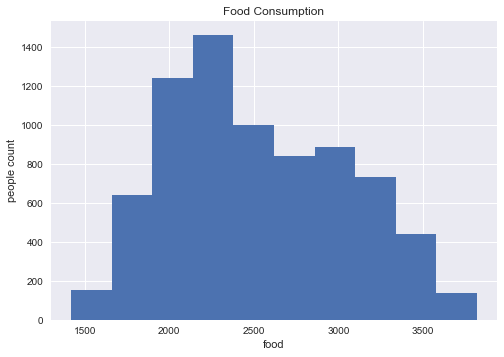

In [271]:
available_food_data = consumption_data[~np.isnan(consumption_data.food)]
show_histogram(available_food_data.food, "food (kcal)", "people count", "Food Consumption")

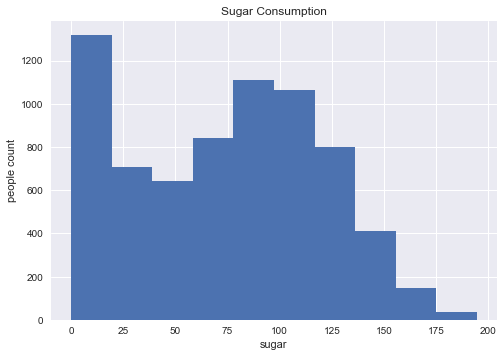

In [274]:
available_sugar_data = consumption_data[~np.isnan(consumption_data.sugar)]
show_histogram(available_sugar_data.sugar, "sugar (g per day)", "people count", "Sugar Consumption")

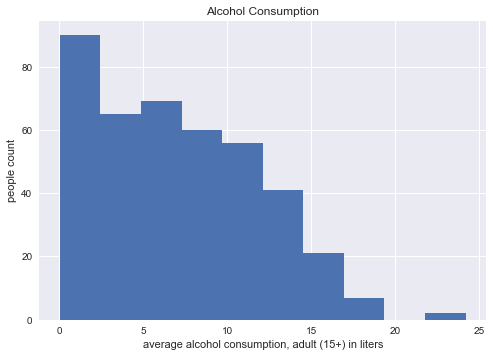

In [279]:
available_alcohol_data = consumption_data[~np.isnan(consumption_data.alcohol)]
show_histogram(available_alcohol_data.alcohol, 
               "average alcohol consumption, adult (15+) in liters", "people count", "Alcohol Consumption")

In [56]:
print(consumption_data.year.unique(), os.linesep)
print(measurements_data.year.unique(), os.linesep)

years_intersection = set(consumption_data.year.unique()).intersection(measurements_data.year.unique())
print(years_intersection)

[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008] 

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008] 

{1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008}


In [174]:
countries_intersection = set(consumption_data.country.unique()).intersection(measurements_data.country.unique())
print(countries_intersection)

{'Comoros', 'Albania', 'Guinea', 'Russia', 'Switzerland', 'Ukraine', 'Costa Rica', 'Kyrgyzstan', 'Indonesia', 'Libya', 'Kiribati', 'Nigeria', 'Iraq', 'Netherlands Antilles', 'Serbia', 'Antigua and Barbuda', 'Eritrea', 'Cook Islands', 'Congo, Rep.', 'Jordan', 'Sweden', 'Nauru', 'Venezuela', 'Iran', 'Ireland', 'Bahamas', 'Dominica', 'Croatia', 'Panama', 'Denmark', 'Estonia', 'Israel', 'Vietnam', 'Georgia', 'Czech Rep.', 'Bolivia', 'Yemen, Rep.', 'Togo', 'Haiti', 'Macedonia, FYR', 'Slovenia', 'Chile', 'Malaysia', 'Netherlands', 'Laos', 'Zimbabwe', 'Slovak Republic', 'Korea, Rep.', 'Dominican Rep.', 'Lesotho', 'Palau', 'South Africa', 'Sao Tome and Principe', 'Bangladesh', 'Cyprus', 'Mauritius', 'Niger', 'Madagascar', 'Pakistan', 'Ghana', 'Sri Lanka', 'Bhutan', 'Namibia', 'Belarus', 'Bermuda', 'Belgium', 'Colombia', 'China', 'Greece', 'Seychelles', "Cote d'Ivoire", 'Germany', 'Uganda', 'Hungary', 'Malta', 'Lebanon', 'Solomon Islands', 'Mongolia', 'Burkina Faso', 'El Salvador', 'Uzbekistan'

Well, we have a lot of different years and countries in our 2 datasets. Maybe it's a good idea to merge them to one dataset by country and year.

In [78]:
data = merge_outer_multiple_datasets([consumption_data, measurements_data], on = ["year", "country"])

I'll write some functions that will help us to work easy with our data.

In [238]:
def get_available_data_for_two_columns(data, first_column, second_column):
    condition = data[first_column].notnull() & data[second_column].notnull()
    filtered_data = data[condition]
    return filtered_data

In [178]:
def get_correlation_coefficient(data, first_column, second_column):
    filtered_data = get_available_data_for_two_columns(data, first_column, second_column)
    correlation = filtered_data[first_column].corr(filtered_data[second_column])
    return correlation

In [180]:
# rename me to show_scatter_plot
def scatter_plot(data, x_column, y_column, x_limits):
    filtered_data = get_available_data_for_two_columns(data, x_column, y_column)
    plt.scatter(filtered_data[x_column], filtered_data[y_column])
    plt.xlim(x_limits[0], x_limits[1])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

#### Cholesterol

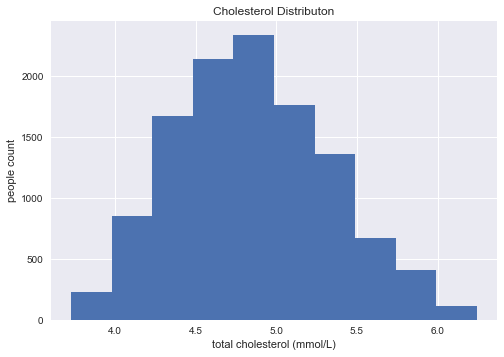

In [280]:
available_cholesterol_data = data[~data.cholesterol.isnull()]
show_histogram(available_cholesterol_data.cholesterol, "total cholesterol (mmol/L)", "people count", "Cholesterol Distributon")

We can see the table below, to understand more about cholesterol.

<img src="images/cholesterol levels.png" alt="cholesterol levels table" >
<div>
    Source: 
    <a href="https://en.wikipedia.org/wiki/Cholesterol">wikipedia</a>
</div>

Let's see how much records we have with low/high/bordeline risk for heart disease

In [281]:
food_and_cholesterol_data = get_available_data_for_two_columns(data, "food", "cholesterol")

condition = food_and_cholesterol_data.cholesterol < 5.2
low_risk = food_and_cholesterol_data[condition]
print("Low risk count:", len(low_risk))

condition = (food_and_cholesterol_data.cholesterol >= 5.2) & (food_and_cholesterol_data.cholesterol <= 6.2)
borderline = food_and_cholesterol_data[condition]
print("Borderline high risk count:", len(borderline))

condition = food_and_cholesterol_data.cholesterol > 6.2
high_risk = food_and_cholesterol_data[condition]
print("High risk count:", len(high_risk))

Low risk count: 7059
Borderline high risk count: 2085
High risk count: 2


Let's see the correlation between the **food** and **choresterol level** for the people with low risk and the people with "borderline high risk".

In [259]:
print(low_risk.food.corr(low_risk.cholesterol))
print(borderline.food.corr(borderline.cholesterol))

0.567821430719
0.168356160118


I also want to see the correlation between the food consumption and chorelesterol for all "cholesterol levels" and the correlation between the choresterol and sugar consumption.

Correlation between cholesterol and food: 0.734355542214


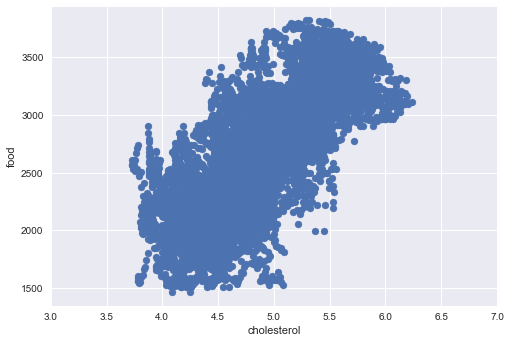

Correlation between cholesterol and sugar: 0.659601067244


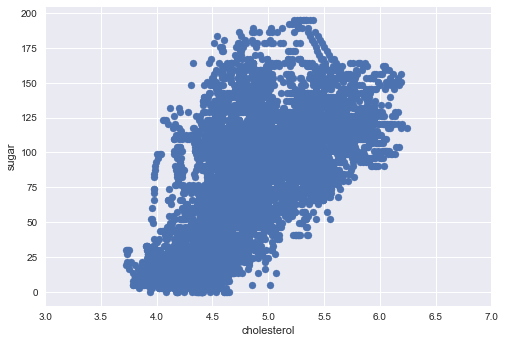

In [269]:
x_limits = (3, 7)

print("Correlation between cholesterol and food:", get_correlation_coefficient(data, "cholesterol", "food"))
scatter_plot(data, "cholesterol", "food", x_limits)

print("Correlation between cholesterol and sugar:", get_correlation_coefficient(data, "cholesterol", "sugar"))
scatter_plot(data, "cholesterol", "sugar", x_limits)

#### BMI

Correlation between bmi and food: 0.638184754333


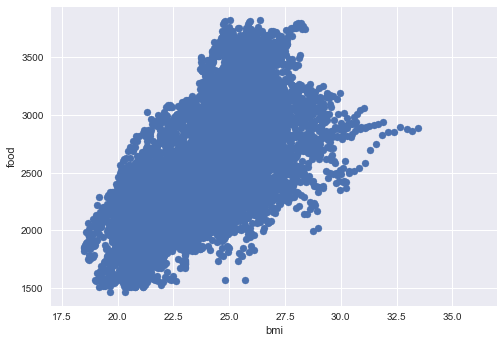

Correlation between bmi and sugar: 0.651434865759


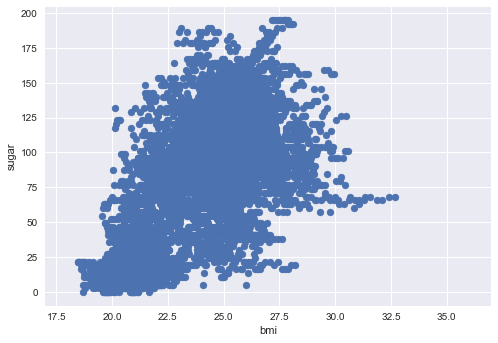

Correlation between bmi and alcohol: 0.185887185775


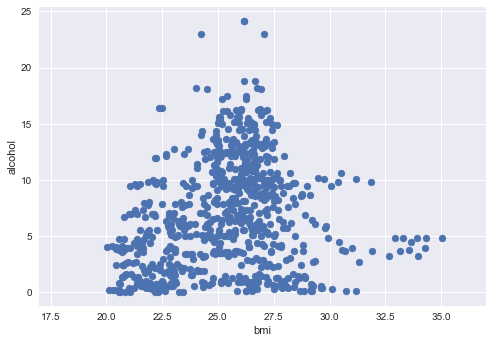

In [282]:
x_limits = (17, 37)

print("Correlation between bmi and food:", get_correlation_coefficient(data, "bmi", "food"))
scatter_plot(data, "bmi", "food", x_limits)

print("Correlation between bmi and sugar:", get_correlation_coefficient(data, "bmi", "sugar"))
scatter_plot(data, "bmi", "sugar", x_limits)

print("Correlation between bmi and alcohol:", get_correlation_coefficient(data, "bmi", "alcohol"))
scatter_plot(data, "bmi", "alcohol", x_limits)

#### Blood Pressure

Correlation between the systolic blood pressure and food consumption: 0.189437718807


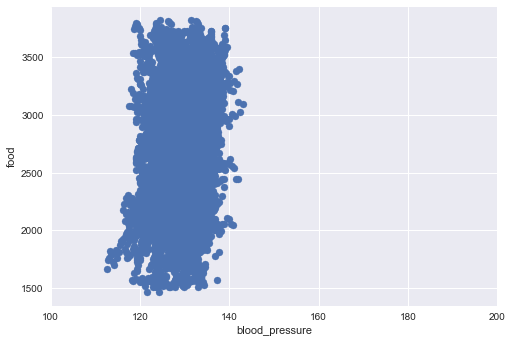

Correlation between the systolic blood pressure (mm-Hg) and sugar consumption : 0.100472133308


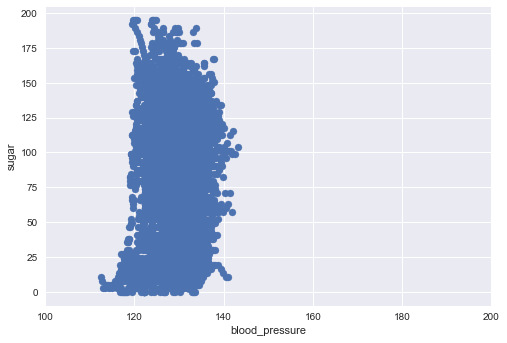

Correlation between the systolic blood pressure and alcohol consumption: 0.225061667053


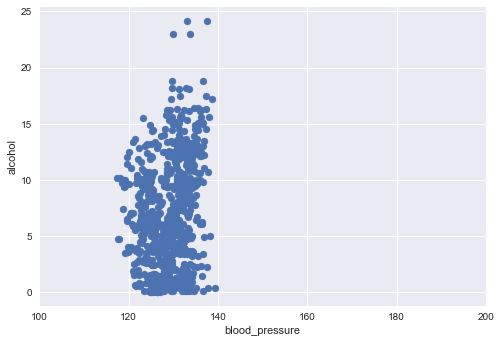

In [290]:
x_limits = (100, 200)

print("Correlation between the systolic blood pressure and food consumption:",
      get_correlation_coefficient(data, "blood_pressure", "food"))
scatter_plot(data, "blood_pressure", "food", x_limits)

print("Correlation between the systolic blood pressure (mm-Hg) and sugar consumption :",
      get_correlation_coefficient(data, "blood_pressure", "sugar"))
scatter_plot(data, "blood_pressure", "sugar", x_limits)

print("Correlation between the systolic blood pressure and alcohol consumption:",
      get_correlation_coefficient(data, "blood_pressure", "alcohol"))
scatter_plot(data, "blood_pressure", "alcohol", x_limits)

### Part 5: Interpreting the Data
* There's a high correlation between the **cholesterol** and **food consumption**: **0.73**. If we eat more our cholesterol level is increasing.
* There's a correlation between the **BMI** and **sugar consumption**: **0.65**. If we eat more sugar our BMI is increasing.

However, correlation doesn't imply causation, so these are just my own assumptions.